In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import sys
import json
from datetime import datetime
import numpy as np
import seaborn as sns
import sqlite3

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

GRAPH_DIR = "./Graphs"
out_dir = GRAPH_DIR

sys.path.insert(1, "../")
sys.path.insert(1, "../utilities")

In [2]:
dates_fp = "../resources/reduced-key-dates.csv"

key_dates = pd.read_csv(dates_fp, delimiter="\t")

convert_to_date = lambda x: datetime.strptime(x, "%d-%m-%Y")
key_dates["date"] = key_dates["date"].apply(convert_to_date)
key_dates.set_index("date", inplace=True)
key_dates = key_dates.sort_index(ascending=True)

In [3]:
key_dates

,event,colour,transparency
date,,,
2015-05-07,2015 General Election,#2ca25f,0.5
2016-02-22,Date of Referendum Announced and New Deal Nego...,#66c2a4,0.2
2016-05-11,EU Referendum Leaflet Released,#66c2a4,0.2
2016-06-23,EU Referendum,#2ca25f,0.5
2016-07-13,Theresa May becomes PM,#2ca25f,0.5
2016-11-02,Theresa May Announces Intention to Leave by March,#2ca25f,0.2
2017-03-16,European Union (Notification of Withdrawal) Bi...,#66c2a4,0.2
2017-04-18,General Election Announced,#2ca25f,0.5
2017-06-08,2017 General Election,#2ca25f,0.5


In [4]:
# fig, ax = plt.subplots(figsize=(5,15))
# ax.axvline(0.5)
# ax.set_ylim(datetime(2015, 5, 7), datetime(2020, 12, 12))
# plt.show()

In [5]:
names = np.arange(key_dates.shape[0]) + 1

dates = key_dates.index

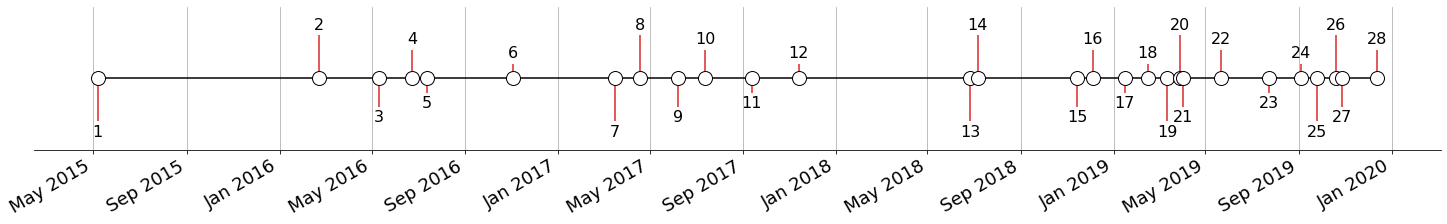

In [6]:
# Choose some nice levels
levels = np.tile([-3, 3, -2, 2, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20, 3), constrained_layout=True)
ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w", markersize=14)  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(0, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l > 0 else "top", fontsize=16)

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right", fontsize=18)

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylim(-5, 5)

ax.margins(y=0.1)
ax.grid()
plt.show()

In [7]:
names = key_dates["event"]#.apply(lambda x: x[:10])
names = [f"({i+1}) {n}" for i, n in enumerate(names)]

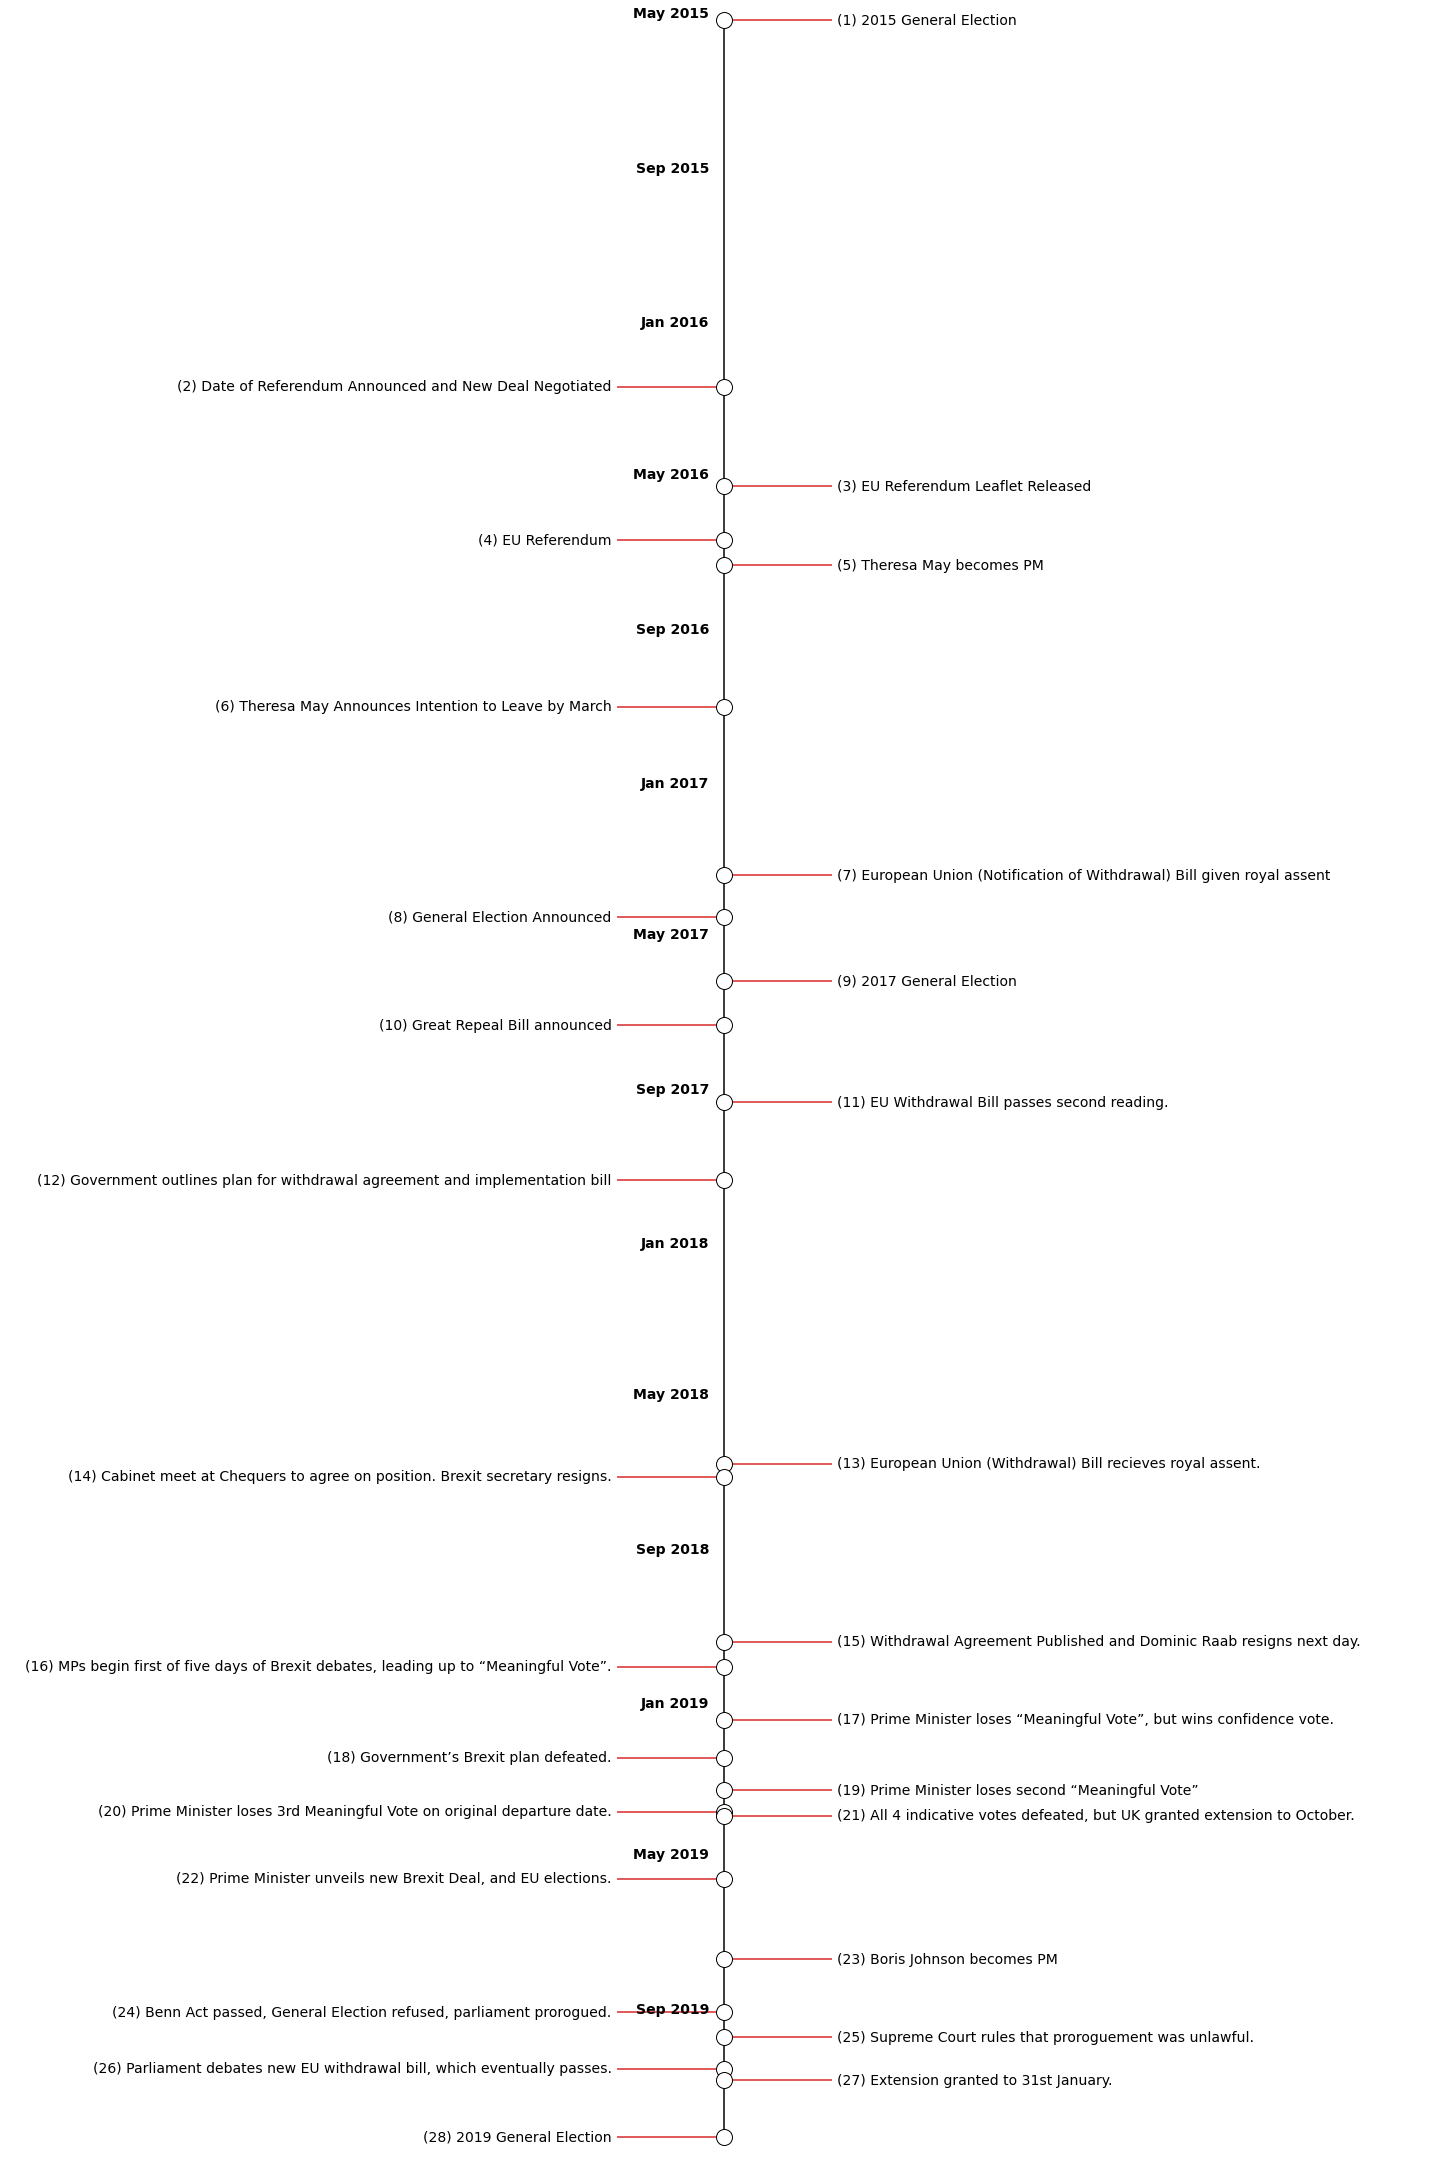

In [8]:
# Choose some nice levels
levels = np.tile([-11, 11, -8, 8, -5, 5],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

levels = np.tile([3, -3],
                 int(np.ceil(len(dates)/2)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20, 30), constrained_layout=True)
ax.hlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(np.zeros(len(dates)), dates, "-o",
        color="k", markerfacecolor="w", markersize=16)  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(l, d),
                xytext=(np.sign(l)*5, 0), textcoords="offset points",
                horizontalalignment="left" if l > 0 else "right",
                verticalalignment="center", fontsize=14, annotation_clip=False)

# format xaxis with 4 month intervals
ax.yaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.yaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_yticklabels(), rotation=0, ha="right", fontsize=14)

# remove y axis and spines
ax.xaxis.set_visible(False)
ax.spines['left'].set_position('center')
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# ax.set_ylim(datetime(2015, 1, 1), datetime(2020, 1, 1))
ax.set_ylim(datetime(2019, 12, 31), datetime(2015, 5, 1))
# ax.set_ylim(datetime(2019, 12, 12), datetime(2015, 5, 7))

for t in plt.yticks()[1]:
    t.set_fontsize(14)
    
plt.yticks(weight="bold")
ax.tick_params(axis=u'both', which=u'both',length=0, pad=15)
ax.set_axisbelow(False)

ax.set_xlim(-20, 20)

ax.margins(y=0.1)
# ax.grid()
fig.savefig(os.path.join(out_dir, "brexit_timeline.pdf"))
plt.show()